# 图像卷积

In [8]:
import torch
from torch import nn
import d2l.torch as d2l
import matplotlib.pyplot as plt
import matplotlib

定义二维互相关运算

In [2]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0]-h+1), (X.shape[1]-w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i+h, j:j+w] * K).sum()
    return Y

验证正确性

In [3]:
X = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

定义一个二维卷积层

这里 $kernel\_size$ 传入一个 $tuple$

In [4]:
class conv2d(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

用卷积层检测图像中不同颜色的边缘

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])


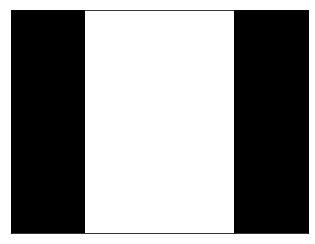

In [13]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
print(X)
plt.matshow(X, cmap=matplotlib.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

输出中的 $1$ 代表黑色到白色的边缘, -1表示从白色到黑色的边缘

In [15]:
K = torch.tensor([[1, -1]])
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

学习一个由 $X$ 生成 $Y$ 的卷积核

$1, 1$ 的意思为: 通道为 $1$ , 样本数为 $1$

In [27]:
net = nn.Conv2d(1, 1, kernel_size=(1,2), bias=False)
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
alpha = 0.01

for i in range(50):
    Y_hat = net(X)
    loss = (Y_hat - Y) ** 2
    net.zero_grad()
    loss.sum().backward()
    net.weight.data[:] -= alpha * net.weight.grad
    if (i+1) % 5 == 0:
        print(f'batch{i+1}, loss{loss.sum():.3f}')

print(net.weight.data)

batch5, loss3.011
batch10, loss0.836
batch15, loss0.233
batch20, loss0.065
batch25, loss0.018
batch30, loss0.005
batch35, loss0.001
batch40, loss0.000
batch45, loss0.000
batch50, loss0.000
tensor([[[[ 0.9986, -0.9986]]]])
